# Workshop 06, September 30, 2022 


**Submit this notebook to bCourses to receive a grade for this Workshop. Submission deadline is 11:59 pm Sunday, October 2, 2022.**


**The workshop should be submitted on bCourses under the Assignments tab (both the .ipynb and .pdf files). Please label it by your student ID number (SIS ID)**

The goal of this workshop is two-fold: first, the practice and exercise would allow you to improve your level of comfort with numpy arrays; second, it also introduces you to the basics of collider data, which we will deal with over the course of this semester.  

In [ ]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

## Practice and Exericse 1

Write a function to take a numpy array object as input and print out its dimension, shape, and size. We will use this function later in the workshop to check properties of arrays.



In [ ]:
def checkarray(x):
    # develop your code here


After completing your `checkarray` funciton, execute the cell below and see the properties of array `a` 

In [ ]:
a = np.random.normal(125,2,size=500)

checkarray(a)

See what's changed after reshape

In [ ]:
a1 = a.reshape(500,1)
checkarray(a1)
print(a1)

Understand the differences between the three lines

In [ ]:
a2 = a1[1:250]
a3 = a1[0:250]
a4 = a1[250:]

checkarray(a2)
checkarray(a3)
checkarray(a4)

**We want to do an hstack of a3 and a4, so that the new array a5 is of shape (250,2). Fix the line below**

In [ ]:
a5 = np.hstack(a3,a4)
checkarray(a5)

**Draw the distribution the second entries on the axis 1 of array a5**

Fill in the missing code in the cell below 

In [ ]:
import matplotlib.pyplot as plt
plt.hist( # MISSING PART OF THE CODE 
    , bins =20, range=(115,135))
plt.xlabel('a5')
plt.ylabel('Number of Entries')


**Reshape a5 to (5,10,10) and print all elements whose axis-1 position is between 6 and 10 (including 6 and 10) and axis-2 position is between 4 and 7 (including 4 and 7). The index will be posiition -1**

In [ ]:
# Reshape and checkarray 
a5 = a5.reshape()
checkarray(a5)

In [ ]:
print(a5[] )

## Pratice and Exercise 2

The `data1` array generated here is 2-dimensional, and it has a shape of (500,2). The first entry of its axis-1 is corresponding to the variable a, and the second entry of its axis-1 is corresponding to the variable b. Each entry of axis 0 gives a pair of (a,b) and is referred to as a data point.

In the cell below, a and b are generated by randomly sampling some probability density functions. We will get more exposure to np.random later this semester. For now, you just need to execute the cell below and get the data points consisting of pairs of a and b.  

In [ ]:
# This cell is used to generate the data array `data1`
# Do not modify this cell
np.random.seed(1)
a = np.random.normal(125,2,size=500)
b = np.random.exponential(0.5, size=500)*a 
# you may wish to visualize the data just generated
plt.scatter(a,b)
plt.xlabel('a')
plt.ylabel('b')

a = a.reshape(500,1)
b = b.reshape(500,1)
data1 = np.hstack((a,b))


Draw a distribution of $a$ from numpy array data1. $a$ corresponds to the first entries on axis 1.
- also take note how the hist method is used
- always properly label your plots

In [ ]:
plt.hist(data1[:,0], bins = 40, range=(115,135), color='red')
plt.xlabel('a')
plt.ylabel('Number of Entries')


Draw a distribution of $b$ from numpy array data1. $b$ corresponds to the second entries on axis 1
- only keep data points where b > 50
- change the number of bins to 60
- change the range of the histogram to 0 < b < 360


In [ ]:
selected_data = data1[ np.where( data1[:,1] > 50 )]
plt.hist(selected_data[:,1], bins = 60, range=(0,360))
plt.xlabel('b [b>50]')
plt.ylabel('Number of Entries')


Draw distribution of *a* for those data points where b <50
- note that the selection is on *b* but the distribution is about *a*
- the expression `np.where( data1[:,1]<50 )` would return a set of positions on axis 0 where b < 50 is satisfied
- a and b occupy different entries on axis 1, but their indexing on axis 0 are the same
    - so we obtain the axis-0 positions of data points that satisfy b < 50 from `np.where( data1[:,1]<50 )`, and we apply it to the numpy array of a



In [ ]:
SelectedData = data1[np.where(data1[:,1]>50)]
plt.hist(SelectedData[:,0], bins = 40, range=(115,135))
plt.xlabel('a [b>50]')
plt.ylabel('Number of Entries')

Draw the distribution of *a* for those data points where b < 50 and 123 < a < 127
- now we need to implement two selection requirements

In [ ]:
SelectedData = data1[np.where(data1[:,1]>50)]
SelectedData = SelectedData[np.where( np.abs(SelectedData[:,0]-125)<2) ]
plt.hist(SelectedData[:,0], bins = 40, range=(120,130))
plt.xlabel('a [b>50 AND 123 < a < 127]')
plt.ylabel('Number of Entries')

In [ ]:
# or we could do both selection in one go
# Pay attention to how the logic AND is implemented here
SelectedData = data1[np.where( (data1[:,1]>50) * ( np.abs(data1[:,0] - 125) < 2) ) ]
plt.hist(SelectedData[:,0], bins = 40, range=(120,130))
plt.xlabel('a [b>50 AND 123 < a < 127]')
plt.ylabel('Number of Entries')

### Your turn. Practice:
- Draw the distribution of *b* for data points where 0.95 < a/b > 1.3
    - label the x and y axes properly, following the convention used in the previous cells


In [ ]:
# Develop your code here

- Draw a scatter plot of a vs a/b for data points where b < 150 AND 121 < a < 129 AND a/b > 0.2
    - Set the y axis scale to logarithmic
    - Label x and y axes properly

In [ ]:
# Develop your code here

# Practice and Exercise 3

In this problem, we define an angle variable $\phi$ that has a range between 0 and 2$\pi$. A sequence of 1000 values of $\phi$ is generated using the linspace method of numpy. We then generated a sequence of coordinates (x,y) on a circle defined by $x^2 + y^2 = r^2, r = 1$, from the $\phi$ sequenece. This is realized by $x = rcos(\phi), y = rsin(\phi)$. The (x,y) pairs are drawn on a scatter plot. 

In [ ]:
# Execute this cell, but do not modify
phi = np.linspace(0,2*np.pi,1000)
r = 1
x, y = r*np.cos(phi), r*np.sin(phi)
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal') # changing the aspect ratio to 1:1



The plot above shows a sequence of 1000 points on the x-y plane. **Now we want to create a numpy array of $tan(x/y)$, only for those (x,y) points where y < 0**

In [ ]:
# Does this work?
tan_x_over_y = np.tan(x/y)

In [ ]:
# to get all y values from (x,y) points where y < 0
# simply do
y[np.where(y<0)]

In [ ]:
# to get all x values from (x,y) points where y < 0
x[np.where(y<0)]

# N.B. x and y have the same ordering. Therefore, the positions in the array y that satisfy y < 0 are the
# positions in the x array for which their y counterparts are negative

In [ ]:
plt.scatter(x[np.where(y<0)], y[np.where(y<0)])
plt.xlabel("x")
plt.ylabel("y")


### your turn
**what if we only want to see the points where x < 0 and y > 0? Complete the cell below**

In [ ]:
#complete the line below
plt.scatter(x[         ], y[         ])
plt.xlabel("x")
plt.ylabel("y")



**Recovering the angle phi from (x,y)**

Now that we have a sequence of 1000 (x,y) points. We want to recover the original angular values `phi`. Intuitively, this would be achieved by taking the inverse of some trigonometric functions. After all, x/r is just the cos$\phi$, y/x is just the tan$\phi$. As you execute the next cell, you'd see that none of the three lines of code would give an angular variable that ranges between 0 and 2$\pi$. 

In [ ]:
plt.plot(np.arcsin(y/r), color='blue')
plt.plot(np.arccos(x/r), color='red')
plt.plot(np.arctan(y/x), color='black')
plt.xlabel('Index of entries')
plt.ylabel('Angle [rad]')

# note that the x axis gives the index of the entries, while the y axis gives the angle value returned 

### Practice
To recover the original angle variable, we can define the following function
$\phi = arccos(x/r)$ if $y > 0 $, or $\phi = 2\pi - arccos(x/r) $ if $y<0$

- write a function that implements the above expression 
    - this function may take x and y as input arguments.
    - the input must be numpy arrays (as generated earlier in the notebook), i.e., we do not want to write a function that takes single-valued scalars and then vectorize it.
    - no for/while loop, if else structures should be used 


In [ ]:
def angle(x , y):
    value = np.arccos(x/np.sqrt(x**2 + y**2))
    value_2pi = 2*np.pi - np.arccos(x/np.sqrt(x**2 + y**2))

    # now how do we combine them? Hints: use np.where() method
    
    value[np.where(y<0)] = value_2pi[ np.where(y<0)]
    return value

In [ ]:
plt.plot(angle(x,y))
plt.xlabel('Index of entries')
plt.ylabel('Angle [rad]')

# Practice and Exercise 4

In special relativity, we have the following relation between energy, mass, and momentum of a particle

$ E^{2} = (mc^2)^2 + (pc)^2$

where $E$, $m$, and $p$, are energy, mass, and momentum of the particle, respectively. $c$ is the speed of light. In particle physics, we adopt *natural units* and the relation is written as

$E^2 = m^2 + p^2$

Note that in this equation the constant $c$ "disappeared." It is absorbed into values of $E$, $m$, and $p$. Under this convention, mass, energy, and momentum all have the same unit electron volt $eV$. In practice, we often use "giga eV" (GeV = 10$^9 eV$) for data produced from high energy experiments. 

We have a list object in the cell below. This list, named as `particle`, has four elements. The first three are the x, y, and z components of its momentum (px, py, pz), and the last is its energy (E). These entries all have a unit of GeV

## practice 4.1 
- Calculate the mass of this particle
    - Convert this list to a numpy array
    - Write a function that takes E, px, py, pz as input arguments and returns the mass value
    - This function must be numpy array friendly, i.e., the input arguments may be either scalars or arrays
    - Based on the mass you get, what could be this particle? Hint: it's one of the elementary particles listed here https://en.wikipedia.org/wiki/Elementary_particle#Mass

In [ ]:
particle = [ 35.11804977,-16.57036233, -48.77524654, 62.34492895 ]

In [ ]:
# Convert the list to array, define a function, and calculate the mass here
particle = np.array(particle).reshape(1,4)

# Note that this array is reshaped to (1,4)
# This change is needed for future extension to this array
# the axis 0 is reserved for particles
# the axis 1 is reserved for properties of a particle

# develop your code here

def mass( E, px, py, pz):




In [ ]:
# Print out the mass value
print(mass( particle[:,3], particle[:,0], particle[:,1], particle[:,2] ))

#### Collider Coordinate System
The coordinate system of a collider experiment is defined as follows.

The beam direction, the direction of the incoming colliding particles, is corresponding to the z axis. The x and y axes define a plane that is perpendicular to the beam direction (z axis). The x-y plane is referred to as the transverse plane, in the sense that it is transverse to beam direciton. 

In a polar coordinate system, one could define the polar angle $\theta$ and the azimuthal angle $\phi$. The polar angle would the angle between the direction of flight of a particle and the beam direction. The azimuthal angle is the angle between the projection of a particle's direction onto the transverse plane and the x-axis. 

These coordinates are illustrated in the sketch below. 

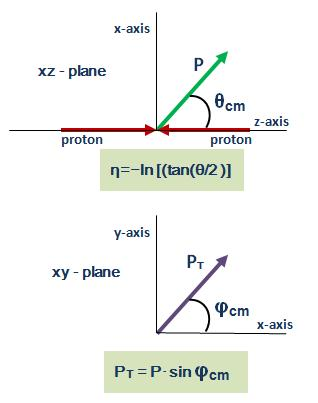

The polar coordinate system provides a different way of presenting the kinematic information of the particle energy and momentum (also referred to as the four momentum).

In the D'Carte coordinate system, we have 
$(E,\vec{p}) = (E, p_x, p_y, p_z)$

In the polar coordinate system, we have
$(E, \vec{p}) = (E, p_T, \theta, \phi)$

where we have 
- $p_T = \sqrt{ p_x^2 + p_y^2}$

- $\phi = arccos(p_x/p), $ if $ y > 0 $ ; $ \phi = 2\pi - arccos(p_x/p), $ if $ y \leq 0 $

- $\theta = arccos(p_z/p)$

$(E, p_x, p_y, p_z)$ and $(E, p_T, \theta, \phi)$ are two representations of the same information possessed by $(E,\vec{p})$, and they are fully equivalent. 

In particle physics data analysis, we replace $\theta$ by $\mathrm{log_e}(\frac{\theta}{2})$. This quantity is referred to as the pseudo-rapidity ($\eta$).  The reason behind replacing $\theta$ by $\eta$ is beyond the scope of this course. If you are interested in this, take Physics 129! This said, since we replaced $\theta$ by $\eta = \mathrm{log_e}(\frac{\theta}{2})$, one can still say that the information is the same between $(E, p_x, p_y, p_z)$ and 
$(E, p_T, \eta, \phi)$. To summarize, we can derive $(E, p_T, \eta, \phi)$ from $(E, p_x, p_y, p_z)$, using the following relations

- $p_T = \sqrt{ p_x^2 + p_y^2}$

- $\phi = arccos(p_x/p), $ if $ y > 0 $ ; $ \phi = 2\pi - arccos(p_x/p), $ if $ y \leq 0 $

- $\eta = \mathrm{log_e}(\frac{\theta}{2})$
    - $\theta = arccos(p_z/p)$


Based on these relations, we can also derive $(E, p_x, p_y, p_z)$ from $(E, p_T, \eta, \phi)$:

- $p_x = p_T cos(\phi)$

- $p_y = p_T sin(\phi)$
 
- $p_z = p_T sinh(\eta)$



## Practice 3.2 
- Define functions to derive pT ($p_T$), phi ($\phi$), and eta ($\eta$), as well as the amplitude of momentum ($p$) and the polar angle $\theta$, from  $(E, p_x, p_y, p_z)$
    - These functions must be able to take numpy arrays as input arguments
- Use the functions you defined to calculate the properties of the particle given in the previous part of the exercise
    - transverse momentum pT
    - amplitude of momentum 
    - $\theta$
    - $\phi$
    - $\eta$
    - summarize your results in a Markdown cell, including units for p and pT (eta, phi, theta are dimensionless quantitites)


In [ ]:
# develop your code here

def pt (px, py):


def momentum (px , py, pz):


def theta (px, py, pz):

def phi (px, py):


def eta (px, py, pz):


In [ ]:
# If your functions are defined properly, these lines below will work out of box
print( pt( particle[:,0], particle[:,1] ))

print( momentum(particle[:,0], particle[:,1], particle[:,2]))

print( theta(particle[:,0], particle[:,1], particle[:,2]))

print( phi(particle[:,0], particle[:,1]) )

print( eta(particle[:,0], particle[:,1], particle[:,2]))


Now we have a second particle. Its kinematic information is given in the list in the next cell. Convert it to a numpy array. 
- What is the mass of this second particle?
- If we consider the two particles as a single physical system, then we could derive the total energy and the total momentum of this physical system.
    - The total energy would be the sum of the energies of the two particles, and the total momentum would be the vector sum of the momenta of the two particles, i.e., we have
        - $E_{tot} = E_1 + E_2$
        - $\vec{p_{tot}} = \vec{p_1} + \vec{p_2}$. More specifically, each component of the total momentum vector is the sum of the corresponding components of the particle momenta: $p_{x,tot} = p_{x,1} + p_{x,2}, p_{y,tot} = p_{y,1} + p_{y,2}, p_{z,tot} = p_{z,1} + p_{z,2}, $. Hints: this component-wise sum is pretty straightforward to implement if the momentum vector is stored as a numpy array
- Let's calculate the following properties of the two-particle system
    - mass
    - pT
    - eta
    - phi 

In [ ]:
particle2 = [-41.19528764,  17.4332439,  -68.96496181,  82.20186639]

In [ ]:
particle2 = np.array(particle2).reshape(1,4)

print(mass( particle2[:,3], particle2[:,0], particle2[:,1], particle2[:,2] ))

In [ ]:
# array "diparticle" has E,px,py,pz of the two-particle system. 
# how do you get it from arrays particle1 and particle2?

# develop your code here
diparticle = 


print(mass( diparticle[:,3], diparticle[:,0], diparticle[:,1], diparticle[:,2] ))


print( pt( diparticle[:,0], diparticle[:,1] ))

print( momentum(diparticle[:,0], diparticle[:,1], diparticle[:,2]))

print( theta(diparticle[:,0], diparticle[:,1], diparticle[:,2]))

print( phi(diparticle[:,0], diparticle[:,1]) )

print( eta(diparticle[:,0], diparticle[:,1], diparticle[:,2]))

